In [28]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
data = pd.read_csv('/home/sargam/things/college/daa/lp3/ml/emails/emails.csv')


In [31]:
print("Dataset shape:", data.shape)
print(data.info())
print(data.head())

Dataset shape: (5172, 3002)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0            

In [32]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [33]:
X = data.iloc[:, 1:-1].values  # all rows, all columns except first and last
y = data.iloc[:, -1].values    # last column: Prediction (1=spam, 0=not spam)

In [34]:
# Step 5: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [35]:
# Step 6: Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Step 7: K-Nearest Neighbors (KNN) Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.821520618556701
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86      1102
           1       0.63      0.93      0.75       450

    accuracy                           0.82      1552
   macro avg       0.80      0.85      0.81      1552
weighted avg       0.87      0.82      0.83      1552

KNN Confusion Matrix:
 [[856 246]
 [ 31 419]]


In [37]:
# Step 8: SVM Classification
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9516752577319587
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1102
           1       0.92      0.92      0.92       450

    accuracy                           0.95      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552

SVM Confusion Matrix:
 [[1065   37]
 [  38  412]]


In [38]:
# Step 9: Compare performance
if accuracy_score(y_test, y_pred_svm) > accuracy_score(y_test, y_pred_knn):
    print("SVM performed better.")
else:
    print("KNN performed better.")

SVM performed better.


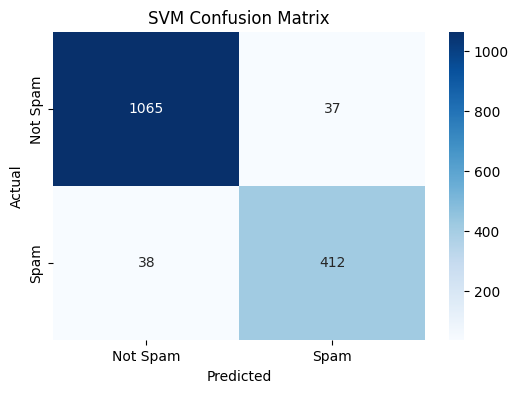

In [39]:
# Step 10: (Optional) Visualize confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

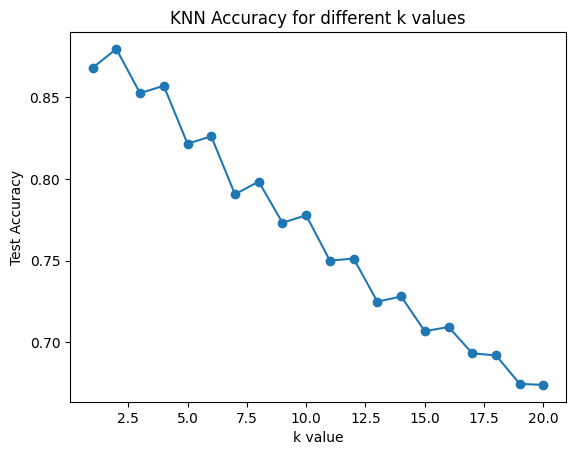

In [40]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Test Accuracy')
plt.title('KNN Accuracy for different k values')
plt.show()
